
# Project: Investigate a Dataset - [No-show appointments]


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset collects information from more than 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. 

There are 14 columns in this Dataset:
1. - PatientId: Identification number of the patient
2. - AppointmentID: Identification number of each appointment
3. - Gender: Male (M) or Female (F)
4. - ScheduledDay: The day the patient set up (registered for) their appointment.
5. - AppointmentDay: The day the patient has show up in the hospital for their apointment.
6. - Age: Patient's age
7. - Neighbourhood: The location of the hospital.
8. - Scholarship: True of False . Observation, this is a broad topic, consider reading this article https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia
9. - Hipertension: Whether the patient has Hypertension: True or False
10. - Diabetes: Whether the patient has Hypertension: True or False
11. - Alcoholism: Whether the patient suffers from alcoholism: True or False
12. - Handcap: Whether the patient is handicaped: True or False
13. - SMS_received: Whether the patient recieves one or more SMS regarding their appointment: True or False
14. - No-show: Whether the patient showed **did not** show up for their appointment: Yes or No.

> **Note**: True or False is represented by 1 and 0 respectively.



### Questions for Analysis

The following are the analysis questions for this project:
> 1. Do patients tend to not show up if their appointment day is on a later day than their scheduled day than if their appointment day is the same as their scheduled day?
> 2. How can age, day of the week and gender be used to predict whether or not a patient will show up for appointments?

#### Import the necessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
# !pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling


### General Properties


#### Read in and view the csv file 

In [3]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


It appears that the ScheduleDay and AppointmentDay column has the full date-time recorded. I am only interested in working with the dates, therefore the time component will be removed in a later step.

#### Use df.info() to check for the number of rows(entries) and columns in the dataframe and check if there is any missing value

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Since the non-null value for all columns is the same as the total number of rows in the dataframe (110527), that means there are no missing values in any row of the data.frame

#### Check the data types and unique values for each column 

In [5]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [6]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

From the data above, there are 62299 unique patients. This means that some patients have more that one appointment recorded.
Aslo, there are 81 neighborhoods and 27 appointment days. 

The Handcap column has five unique values, that is quite odd since the entries for the column are supposed to be 0s and 1s only.


In [7]:
df['Handcap'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

 All values greater than 1 will be treated as 1.


### Data Cleaning

#### 1. Change data types for 'PatientId', 'AppointmentID', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received' from numeric to strings. 

I am changing the data type of the columns mentioned above to string since I would not be performing any numeric computation on them


In [8]:
# get all the column names as a litst
columns = [v for x, v in enumerate(df.columns)]
columns

['PatientId',
 'AppointmentID',
 'Gender',
 'ScheduledDay',
 'AppointmentDay',
 'Age',
 'Neighbourhood',
 'Scholarship',
 'Hipertension',
 'Diabetes',
 'Alcoholism',
 'Handcap',
 'SMS_received',
 'No-show']

In [9]:
# convert the data types to string

for c in columns:
    if c != 'Age':
        df[c] = df[c].astype('str')

#### 2. Remove the time component from 'ScheduledDay' and 'AppointmentDay' columns and convert the data type for both columns to date-time 

I would not be interested with working with the time component, that is why it is being removed in this step. 
The regular expression used to extract the first 10 characters (the full date) of the columns was gotten from stackoverflow. [link](https://stackoverflow.com/questions/47458425/how-do-you-select-specific-range-in-a-string-using-regex)

In [10]:
# extract the first 10 characters of the values in both columns
df.AppointmentDay = df.AppointmentDay.str.extract('^(.{10}).*$')
df.ScheduledDay = df.ScheduledDay.str.extract('^(.{10}).*$')

In [11]:
df.AppointmentDay = pd.to_datetime(df["AppointmentDay"])
df.ScheduledDay = pd.to_datetime(df["ScheduledDay"])

In [12]:
# confirm if the change has been made
df.dtypes

PatientId                 object
AppointmentID             object
Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Scholarship               object
Hipertension              object
Diabetes                  object
Alcoholism                object
Handcap                   object
SMS_received              object
No-show                   object
dtype: object

#### 3. Convert the names of the columns to lower case. Also, change the dash (-) in 'No-show' to underscore (_).

I am more comfortable with working wit lower case names, that is why the names are being changed to lower case

In [13]:
df.rename(columns=lambda x: x.lower().replace('-','_'), inplace=True)

In [14]:
# Confirm the changes

df.head(3)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,29872499824296.0,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438.0,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951.0,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No


All the column names have been changed and the scheduledday and	appointmentday columns have their time component removed succesfully.

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1
###### Do patients tend to not show up if their appointment day is on a later day than their scheduled day than if their appointment day is the same as their scheduled day?

To answer this question, I will divide the dataset into two categories; one for those who had the appointment day to be the same as their scheduled day, and the second for those that had their appointment day on a later day.

In [15]:
# Create a dataframe for patients with appointment day same as scheduled day

appointed_on_scheduled_day = df[df['scheduledday'] == df['appointmentday']]

In [16]:
# Get the counts for 'Yes' and 'No' values
vals1 = appointed_on_scheduled_day['no_show'].value_counts()
vals1

No     36771
Yes     1792
Name: no_show, dtype: int64

In [17]:
# Percentage of the 'Yes' value
percentage = (vals1[1]/vals1.sum())*100
percentage

4.6469413686694505

In [18]:
# Create a dataframe for patients with appointment day not thier scheduled day (on a later day)

appointed_after_scheduled_day = df[df['scheduledday'] < df['appointmentday']]

In [19]:
# Get the counts for 'Yes' and 'No' values
vals2 = appointed_after_scheduled_day['no_show'].value_counts()

In [20]:
# Percentage of the 'Yes' value
percentage = (vals2[1]/vals2.sum())*100

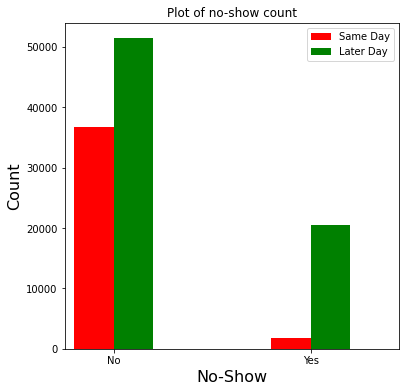

In [54]:
# Plot a bar chart of the yes and no count for the two datasets
vals1.plot(position=1, kind='bar', color='red',  width=0.2, figsize=(6,6), rot=0)
vals2.plot(position=0, kind='bar', color='green',  width=0.2, figsize=(6,6), rot=0)
plt.legend(['Same Day', "Later Day"])
plt.title('Plot of no-show count')
plt.xlabel('No-Show', fontsize=16)
plt.ylabel('Count', fontsize=16);

From the plots above, it appears that patients have the tendency of showing up for their appointments if the appointment is on the same day (95.4% chance) than if the appointment is on a later day (71.5% chance).

In [22]:
# Check if there is any scheduled day later than the appointment day
df[df['scheduledday'] > df['appointmentday']]

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
27033,7839272661752.0,5679978,M,2016-05-10,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes
55226,7896293967868.0,5715660,F,2016-05-18,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes
64175,24252258389979.0,5664962,F,2016-05-05,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes
71533,998231581612122.0,5686628,F,2016-05-11,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes
72362,3787481966821.0,5655637,M,2016-05-04,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes


Suprisingly, there are five entries with scheduled day later than the appointment day. This is probably an error, and it is very insignficant.

### Research Question 2
##### How can age, day of the week and gender be used to predict whether or not a patient will show up for appointments?

1. Age

In [23]:
# check the summary statistics for the age column
df['age'].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

The age will be divide into five categories: Child, Teen, Young Adult, Adult and Old as shown below

In [24]:
# Create a list of the boundaries for the age categories
bin_edges = [0, 12,19, 30, 60,115]

In [25]:
# Create a list of the category names for the age categories
bin_names = [ 'Child', 'Teen', 'Young Adult', 'Adult', 'Old']

In [26]:
# Create the category column
df['age_distribution'] = pd.cut(df['age'], bin_edges, labels=bin_names)

In [27]:
# get the total count for each age distribution
age_dist_count = df.groupby('age_distribution').gender.count()
age_dist_count

age_distribution
Child          17497
Teen            9375
Young Adult    15220
Adult          45133
Old            19762
Name: gender, dtype: int64

In [28]:
# get the count for patients that showed up for each age distribution

age_dist_showed_count = df.groupby(['no_show','age_distribution']).gender.count()
age_dist_showed_count['No']

age_distribution
Child          13829
Teen            6941
Young Adult    11471
Adult          36310
Old            16756
Name: gender, dtype: int64

In [29]:
# get the percentage show for each age distribution

perc_age_dist_showed = (age_dist_showed_count['No']/age_dist_count) *100
perc_age_dist_showed

age_distribution
Child          79.036406
Teen           74.037333
Young Adult    75.367937
Adult          80.451111
Old            84.788989
Name: gender, dtype: float64

In [30]:
# Create a rerusable function for plotting

def plot_graph(title, colors, series, x_label, y_label):
    series.plot(kind='bar', rot=0, fontsize=12, figsize=(7,7), color=colors)
    plt.title(title, fontsize=14)
    plt.ylabel(y_label, fontsize=14)
    plt.xlabel(x_label, fontsize=14);

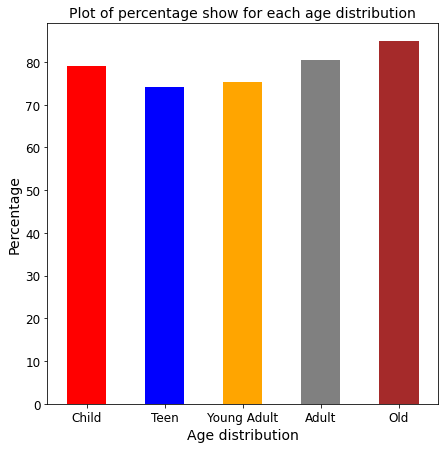

In [31]:
# call the plot_graph function to plot the values
title = 'Plot of percentage show for each age distribution'
colors = ['red', 'blue', 'orange', 'grey', 'brown']
x_label ='Age distribution'
y_label ='Percentage'
plot_graph(title, colors, perc_age_dist_showed, x_label, y_label)

It can be seen from the plot above that Old people above the age of 60 show up most for their schedules, while teenagers tend to not show up most

2. Gender

In [32]:
# Group the entries by gender

gender_count = df.groupby(['gender']).appointmentid.count()
gender_count

gender
F    71840
M    38687
Name: appointmentid, dtype: int64

In [33]:
# Get the count of of those that showed and didn't show for each gender
gender_show_count = df.groupby(['gender', 'no_show']).appointmentid.count()
gender_show_count

gender  no_show
F       No         57246
        Yes        14594
M       No         30962
        Yes         7725
Name: appointmentid, dtype: int64

In [34]:
df.groupby(['gender']).patientid.count()

gender
F    71840
M    38687
Name: patientid, dtype: int64

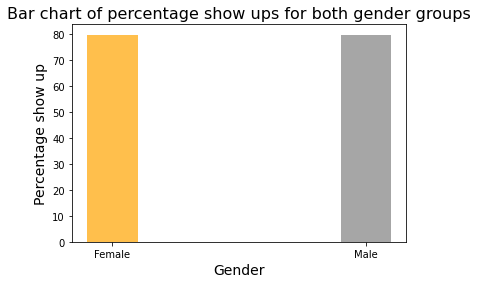

In [35]:
# Get the percentage of those that showed up for each gender, similar to what was done for age
totals = df.groupby(['gender']).patientid.count()
gender_percentage = (gender_show_count / totals)*100

plt.bar(['Female','Male'], gender_percentage[0:2:2], width=0.2, color=['orange', 'grey'], alpha=.7)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Percentage show up', fontsize=14)
plt.title('Bar chart of percentage show ups for both gender groups', fontsize=16);

In [36]:
gender_percentage


gender  no_show
F       No         79.685412
        Yes        20.314588
M       No         80.032052
        Yes        19.967948
dtype: float64

From the above plot, it appers that gender doesn't really help determine whether a person shows up for appointment or not. Both genders have high chances of showing up for their appointments.

3. Day of the week

First, I will create a new column for day of the week which the appointment day falls on.

In [37]:
# Create a new column for day of the week

df['app_week_day'] = df["scheduledday"].dt.day_name()
df['app_week_day'].value_counts()

Tuesday      26168
Wednesday    24262
Monday       23085
Friday       18915
Thursday     18073
Saturday        24
Name: app_week_day, dtype: int64

There appears to be no appointments for Sundays, and the appointment for Saturday is very negligible, therefore I will be dropping the entries that have appointment on Saturday. 

In [38]:
# Create a dataframe that does not consist of appointment days that fall on Saturday
df_modified = df.set_index('app_week_day').drop(index='Saturday').reset_index()
df_modified.head()

,app_week_day,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,age_distribution
0,Friday,29872499824296.0,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Old
1,Friday,558997776694438.0,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Adult
2,Friday,4262962299951.0,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,Old
3,Friday,867951213174.0,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Child
4,Friday,8841186448183.0,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Adult


In [39]:
# Get the count of show for each week day
df_m_counts = df_modified.groupby([ 'no_show', 'app_week_day']).gender.count()
df_m_counts['No']

app_week_day
Friday       15028
Monday       18524
Thursday     14373
Tuesday      20877
Wednesday    19383
Name: gender, dtype: int64

In [40]:
# Get the total count for each weekday
df_m_totals = df_modified.groupby('app_week_day').count()['patientid']
df_m_totals

app_week_day
Friday       18915
Monday       23085
Thursday     18073
Tuesday      26168
Wednesday    24262
Name: patientid, dtype: int64

In [41]:
# Get the percentage show for each weekday
percentage = (df_m_counts['No'] / df_m_totals) *100
percentage

app_week_day
Friday       79.450172
Monday       80.242582
Thursday     79.527472
Tuesday      79.780648
Wednesday    79.890364
dtype: float64

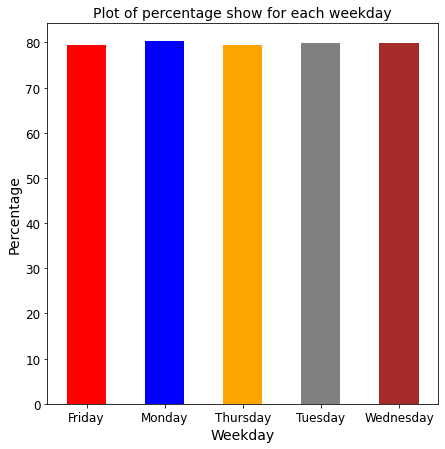

In [42]:
# Use the plot_graph function to make the plot

title = 'Plot of percentage show for each weekday'
colors = ['red', 'blue', 'orange', 'grey', 'brown']
x_label ='Weekday'
y_label ='Percentage'
plot_graph(title, colors, percentage, x_label, y_label)

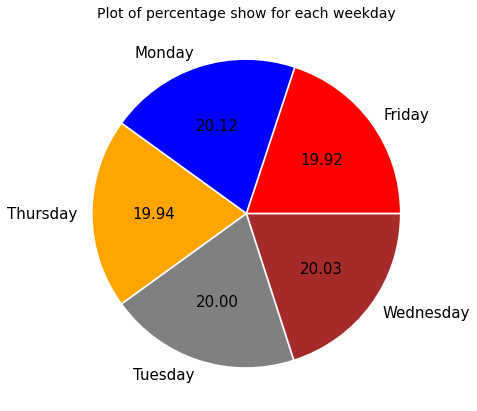

In [55]:
# make a pie chart of the data for further visualization
percentage.plot(kind='pie', explode= [.01,.01, .01, .01, .01],
                fontsize=15, figsize=(7,7), colors=colors, autopct='%.2f')
plt.title('Plot of percentage show for each weekday', fontsize=14)
plt.ylabel('');
# plt.xlabel('', fontsize=14);

It can be concluded that all the weekdays have approximately equal tendency of patients showing up or not. Meaning that the weekday does not affect the chance of the patient showng up or no.

I found how to use the autopct parameter for the pie plot [here](https://stackoverflow.com/questions/6170246/how-do-i-use-matplotlib-autopct)

<a id='conclusions'></a>
## Conclusions

After analysis of the dataset, the questions posed have been answered.
1. Do patients tend to not show up if their appointment day is on a later day than their scheduled day than if their appointment day is the same as their scheduled day?
**Answer**: Yes, patients have more tendency to show up for their appointment if the appointment is on the same day they scheduled.

2. How can age, day of the week and gender be used to predict whether or not a patient will show up for appointments?
**Answer**: People of older age (60 and above) tend to show up more for their appointments, while teenagers tend to miss their appoinments the most.

Also, there is both males and females have equal tendency of showing up, or not, for their appointments.
and the weekday the appointment falls on deos not affect the chances of the patient showing up for appointment or not

Further analysis can be done to draw further insights from the dataset, such as exploring the effect of hospital location on the patient showing up, or whether patients show up more for their first appointments that subsequent ones. 


### Limitations
1. The project does not take hospital location into consideration in all the analysis.
2. The project does not take into consideration the fact that many patients had more than one appointment



In [45]:
# from subprocess import call
# call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])